## Testing all the algorithms till now 
- All the algorithms, i.e., Basic, Iterative, SPEA are analysed for 1-qubit and 2-qubit matrices chosen manually.
- One of the matrix that was chosen for single qubit was the **X gate** and a phase matrix with phase **1/6**.

- **BASIS of TESTING** 
    - Each of the algorithm is given a unitary and run for increasing precision.
    - The algorithm which converges faster is the better algorithm.
    - Converges faster means the amount of iterations of the algorithm required to compute $\theta$ upto 6 bit precision

In [2]:
from qiskit import QuantumCircuit, execute, transpile, Aer 
from qiskit.extensions import UnitaryGate,Initialize
from qiskit.quantum_info import Statevector 
from qiskit.tools.visualization import plot_bloch_vector
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector  
import numpy as np 
from time import sleep 
import sys 
from scipy.stats import unitary_group 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
from vanilla_qpe import QPE 
from multi_q_iterative_qpe import general_IQPE 
from normal_SPEA import SPEA 

- Eigenvectors : $|+\rangle\ and\ |-\rangle$
- Eigenphases : $0\ or\ 1$ and $\frac{1}{2}$

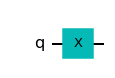

In [4]:
# x gate 
u1 = QuantumCircuit(1)
u1.x(0)
u1.draw('mpl')

- Eigenvectors : $|0\rangle\ and\ |1\rangle$
- Eigenphases : $0\ or\ 1$ and $\frac{1}{6}$

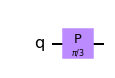

In [5]:
# x gate 
u2 = QuantumCircuit(1)
u2.p(2*np.pi*(1/6),0)
u2.draw('mpl')

In [6]:
backend = Aer.get_backend('qasm_simulator')

## Testing the Unitary Phase Estimation
- **Basic QPE**

In [38]:
estimates = []
for precision in range(1,9): 
    qpe = QPE(precision=precision,unitary = u1)
    qpe_circ = qpe.get_QPE(show = False)
    qc = QuantumCircuit(precision+1,precision)
    qc.x(precision)
    qc.h(precision)
    qc.append(qpe_circ, qargs = list(range(precision+1)))
    qc.measure(list(range(precision)),list(range(precision)))
#     display(qc.draw('mpl')) 
    counts = execute(qc,backend=backend,shots = 2**10).result().get_counts()
    m = -1 
    for i,j in counts.items():
        if j > m:
            m = j 
            phase = i 
    factor = 0.5
    ans = 0.0 
    for i in range(precision):
        ans+= int(phase[i])*factor 
        factor/=2 
    estimates.append(ans)

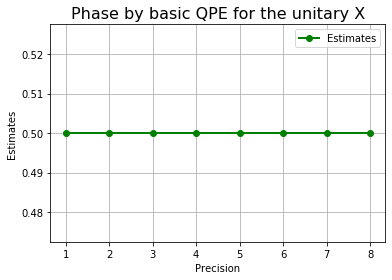

In [39]:
plt.title("Phase by basic QPE for the unitary X",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.show()

- **IQPE**

In [42]:
estimates = []
for precision in range(1,9): 
    qpe = general_IQPE(precision=precision,unitary = u1,unknown=True)
    qc = QuantumCircuit(precision+1,precision)
    qc.x(1)
    qc.h(1)    
    phase = qpe.get_circuit_phase(qc, qubits = [1], ancilla = 0,clbits = list(range(precision)),show = False)
#     display(qc.draw('mpl')) 
    estimates.append(phase[1])

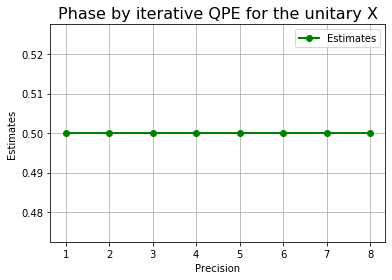

In [43]:
plt.title("Phase by iterative QPE for the unitary X",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.show()

- SPEA

In [48]:
estimates = []
for resolution in range(10,40,5): 
    qpe = SPEA(resolution = resolution,unitary = u1, error =4)
    result = qpe.get_eigen_pair()
#     display(qc.draw('mpl')) 
    print("Result : ",result)
    estimates.append(result['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.985, 'theta': 0.4717881944444445, 'state': array([ 0.72140571-0.28263791j, -0.49477534+0.39355684j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.935, 'theta': 0.0, 'state': array([-0.56401405-0.65124799j, -0.13658106-0.48898857j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.9975, 'theta': 0.9927285318559557, 'state': array([-0.60427718+0.20020874j, -0.76956441+0.05036033j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.99, 'theta': 0.007821919005594136, 'state': array([-0.27158797-0.46797831j, -0.33972233-0.76930164j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.9875, 'theta': 1.0, 'state': array([-0.29705348-0.73676723j, -0.39498887-0.46142939j])}
Result :  {'cost': 1.0, 'theta': 0.5294117647058824,

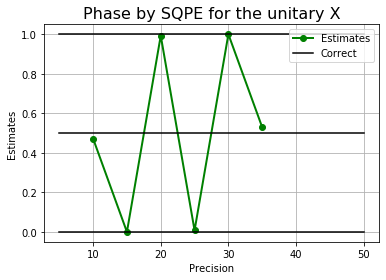

In [53]:
plt.title("Phase by SQPE for the unitary X",fontsize = 16)
plt.plot([i for i in range(10,40,5)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([5,50],[0.5,0.5],color = 'black')
plt.plot([5,50],[0,0],color = 'black')
plt.plot([5,50],[1,1],color = 'black',label = 'Correct')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.show()

## Testing the PEA for unitary phase gate
- Testing phase estimation for $\theta$ = 1/6
- Eigenvectror is $|1\rangle$

- **Basic QPE**

In [7]:
estimates = []
for precision in range(1,9): 
    qpe = QPE(precision=precision,unitary = u2)
    qpe_circ = qpe.get_QPE(show = False)
    qc = QuantumCircuit(precision+1,precision)
    qc.x(precision)
    qc.append(qpe_circ, qargs = list(range(precision+1)))
    qc.measure(list(range(precision)),list(range(precision)))
#     display(qc.draw('mpl')) 
    counts = execute(qc,backend=backend,shots = 2**10).result().get_counts()
    m = -1 
    for i,j in counts.items():
        if j > m:
            m = j 
            phase = i 
    factor = 0.5
    ans = 0.0 
    for i in range(precision):
        ans+= int(phase[i])*factor 
        factor/=2 
    estimates.append(ans)

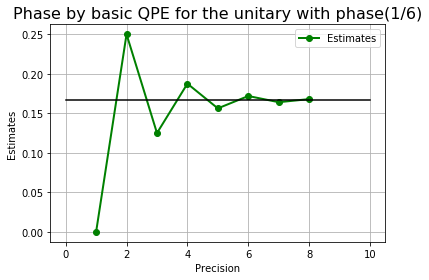

In [9]:
plt.title("Phase by basic QPE for the unitary with phase(1/6)",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([0,10],[0.1667,0.1667], color = 'black')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.show()

- **IQPE**

In [17]:
estimates = []
for precision in range(1,9): 
    qpe = general_IQPE(precision=precision,unitary = u2,unknown=True)
    qc = QuantumCircuit(1+1,precision)
    qc.x(1)   
    phase = qpe.get_circuit_phase(qc, qubits = [1], ancilla = 0,clbits = list(range(precision)),show = False)
#     display(qc.draw('mpl')) 
    estimates.append(phase[1])

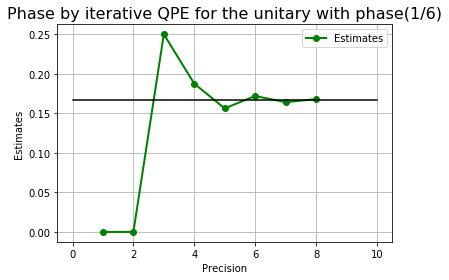

In [18]:
plt.title("Phase by iterative QPE for the unitary with phase(1/6)",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([0,10],[0.1667,0.1667], color = 'black')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.show()

- **SPEA**

In [19]:
estimates = []
for resolution in range(10,40,5): 
    qpe = SPEA(resolution = resolution,unitary = u2, error =4)
    result = qpe.get_eigen_pair(backend = backend)
#     display(qc.draw('mpl')) 
    print("Result : ",result)
    estimates.append(result['theta'])

Result :  {'cost': 1.0, 'theta': 0.0, 'state': array([ 0.52145469-0.82990724j, -0.17566819+0.09208516j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.9921875, 'theta': 0.15202487244897958, 'state': array([0.36197391+0.00595853j, 0.92684504+0.09948695j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.970703125, 'theta': 0.09001858871555621, 'state': array([ 0.5562698+0.29869457j, -0.5442325+0.55240967j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.998046875, 'theta': 0.18229166666666663, 'state': array([ 0.01181904+0.25217663j, -0.67918584-0.68918347j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.970703125, 'theta': 0.12252321743408913, 'state': array([-0.59148347+7.56389816e-04j, -0.21793143+7.76307041e-01j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'

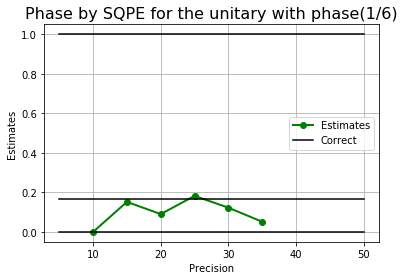

In [20]:
plt.title("Phase by SQPE for the unitary with phase(1/6)",fontsize = 16)
plt.plot([i for i in range(10,40,5)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([5,50],[0.1667,0.1667],color = 'black')
plt.plot([5,50],[0,0],color = 'black')
plt.plot([5,50],[1,1],color = 'black',label = 'Correct')
plt.xlabel('Precision')     
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.show()